In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder


In [2]:
df=pd.read_csv(r"C:\\Users\\dobil\\OneDrive\\Desktop\\MACHINE-LEARNING\\Social_Network_Ads.csv")
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
x=df[["Age","EstimatedSalary"]]

y=df["Purchased"]


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
# s=StandardScaler()
# x_train_scaled=s.fit_transform(x_train)
# x_test_scaled=s.transform(x_test)
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=42,max_depth=4)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=10,
                       random_state=42)

In [10]:
y_pred=rf.predict(x_test)
print("Accuracy:\n",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy:
 0.9125
Confusion Matrix:
 [[47  5]
 [ 2 26]]


<Axes: >

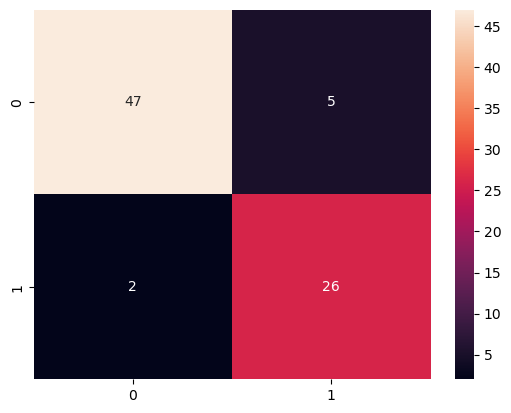

In [11]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

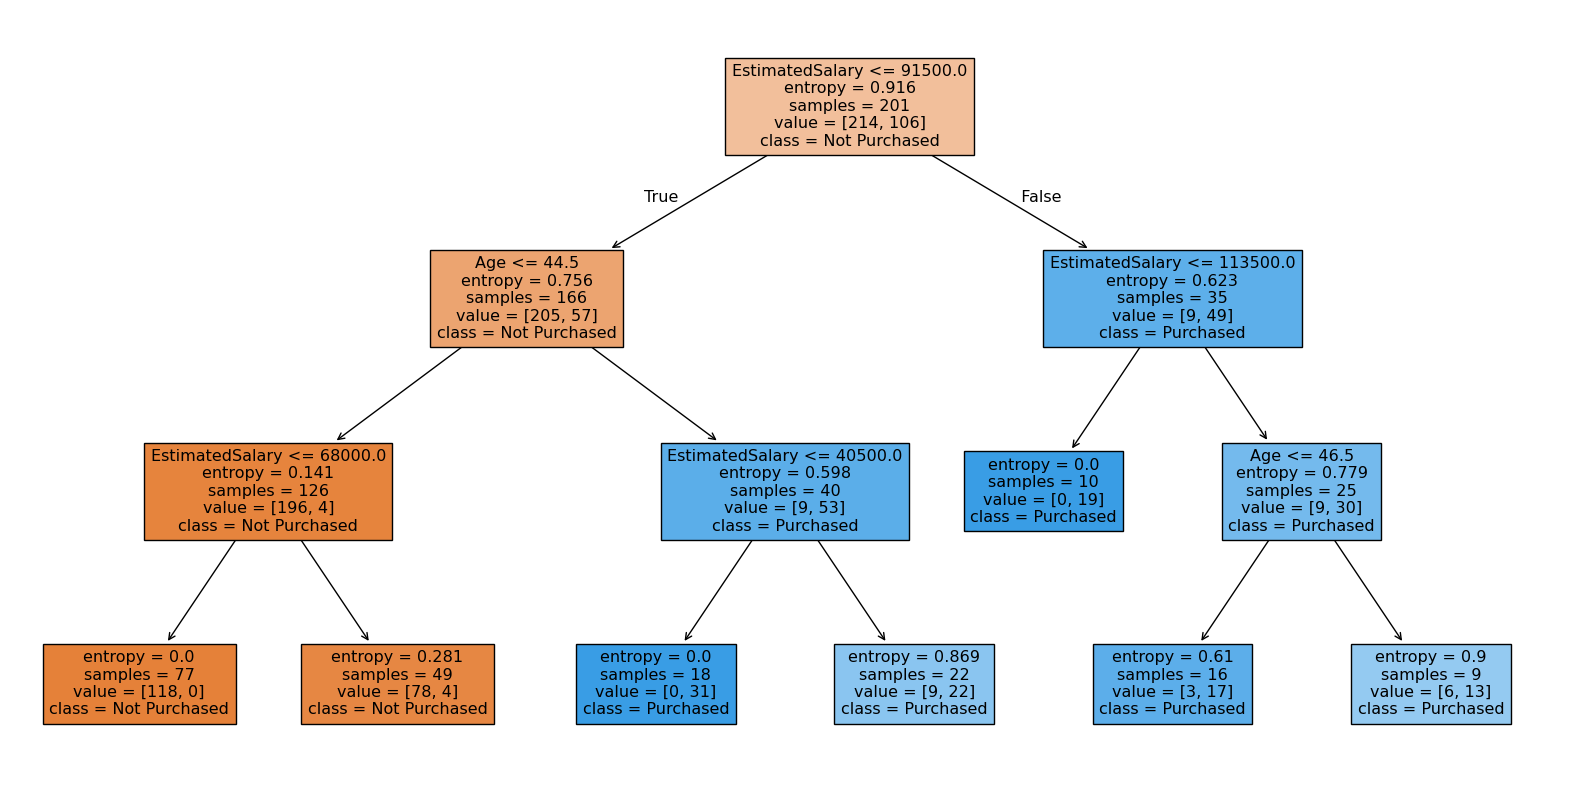

In [8]:
single_tree=rf.estimators_[0]
plt.figure(figsize=(20,10))
plot_tree(single_tree,filled=True,feature_names=x.columns,class_names=['Not Purchased','Purchased'])
plt.show()